In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import os

In [2]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Resizing, Rescaling, RandomFlip, RandomRotation, RandomZoom

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

## Exploratory Visualization and Image Analysis

In [4]:
data_path = 'C:\\Users\\alvar\\Documents\\tf_templates\\DATA\\cell_images'
parasitized_path = data_path + '\\parasitized\\'
uninfected_path = data_path + '\\uninfected\\'

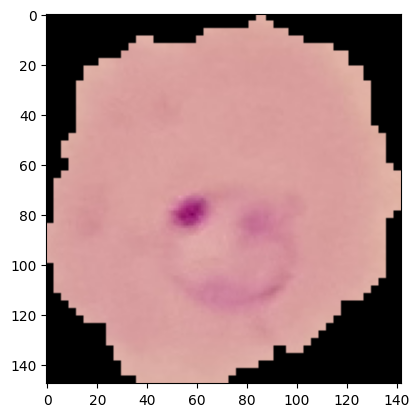

In [5]:
parasitized_cell = parasitized_path + os.listdir(parasitized_path)[0]
parasitized_img = imread(parasitized_cell)
plt.imshow(parasitized_img);

In [6]:
parasitized_img.shape

(148, 142, 3)

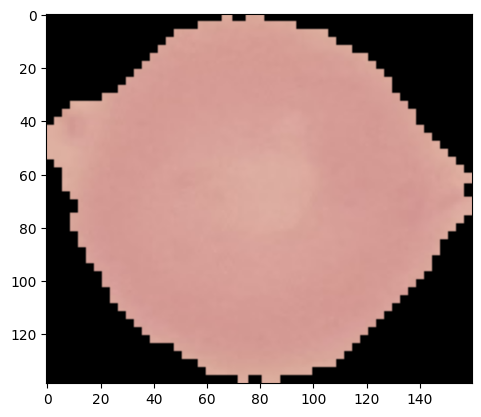

In [7]:
uninfected_cell = uninfected_path + os.listdir(uninfected_path)[0]
uninfected_img = imread(uninfected_cell)
plt.imshow(uninfected_img);

In [8]:
uninfected_img.shape

(139, 160, 3)

In [9]:
dim1 = []
dim2 = []
for image_filename in os.listdir(uninfected_path):
    
    img = imread(uninfected_path + image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

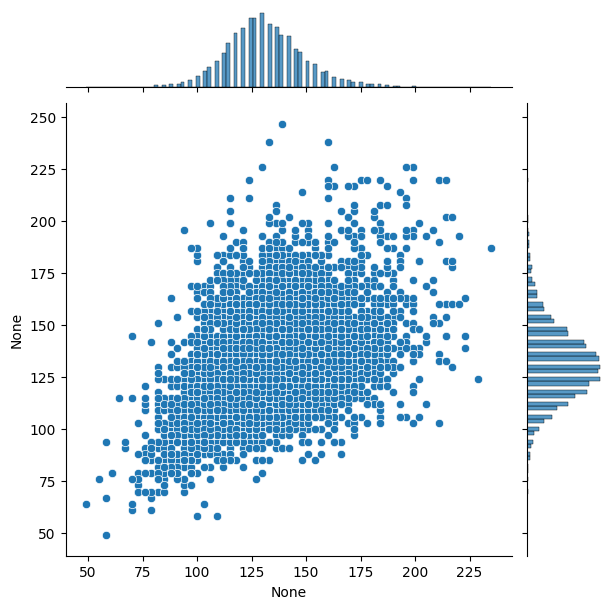

In [10]:
sns.jointplot(x=dim1, y=dim2);

In [11]:
print(np.mean(dim1))
print(np.mean(dim2))

131.58001306335728
131.3424776834313


In [12]:
img_height = 131
img_width = 131

## Train Test Split

In [13]:
train = image_dataset_from_directory(
    data_path,
    validation_split=0.3,
    subset='training',
    seed=101,
    image_size=(img_height, img_width),
    batch_size=64
)

Found 27558 files belonging to 2 classes.
Using 19291 files for training.


In [14]:
test = image_dataset_from_directory(
    data_path,
    validation_split=0.3,
    subset='validation',
    seed=101,
    image_size=(img_height, img_width),
    batch_size=64
)

Found 27558 files belonging to 2 classes.
Using 8267 files for validation.


In [15]:
class_names = train.class_names
class_names

['Parasitized', 'Uninfected']

In [16]:
parasitized_img.max()

0.9098039

## Creating the Model and Training

In [17]:
model = Sequential()

# model.add(Resizing(224,224))
# model.add(Rescaling(1.0/255))

model.add(RandomFlip('horizontal_and_vertical'))
model.add(RandomRotation((-45/180,45/180)))
model.add(RandomZoom(0.2))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=2, activation='softmax'))

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [20]:
model.fit(train, epochs=20, validation_data=test, callbacks=[early_stop])

Epoch 1/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 174s 569ms/step - accuracy: 0.5327 - loss: 12.0353 - val_accuracy: 0.5887 - val_loss: 0.6750
Epoch 2/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 167s 554ms/step - accuracy: 0.5654 - loss: 0.6845 - val_accuracy: 0.6015 - val_loss: 0.6613
Epoch 3/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 170s 563ms/step - accuracy: 0.5699 - loss: 0.6786 - val_accuracy: 0.6037 - val_loss: 0.6604
Epoch 4/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 167s 554ms/step - accuracy: 0.5811 - loss: 0.6769 - val_accuracy: 0.6273 - val_loss: 0.6522
Epoch 5/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 167s 553ms/step - accuracy: 0.5894 - loss: 0.6725 - val_accuracy: 0.6323 - val_loss: 0.6407
Epoch 6/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 167s 553ms/step - accuracy: 0.5996 - loss: 0.6687 - val_accuracy: 0.6256 - val_loss: 0.6533
Epoch 7/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 169s 558ms/step - accuracy: 0.5965 - loss: 0.6695 - val_accuracy: 0.6987 - val_loss: 0.5818
Epoch 8/20
302/302 ━━━━━━━━━━━━━━━━━━━━ 167s 554ms/step - accuracy: 0.8291 

## Save Model

In [21]:
model.save('C:\\Users\\alvar\\Documents\\tf_templates\\CNN\\malaria_model.keras')

## Evaluation

In [22]:
losses = pd.DataFrame(model.history.history)

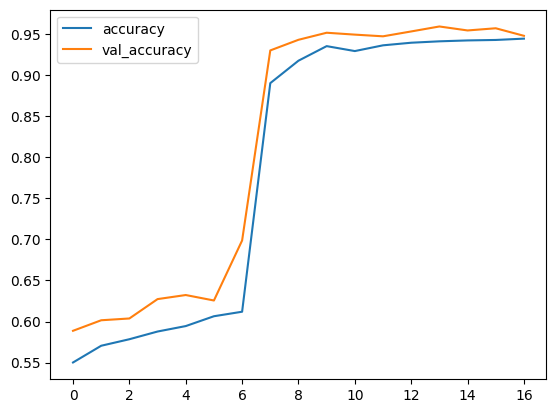

In [23]:
losses[['accuracy','val_accuracy']].plot();

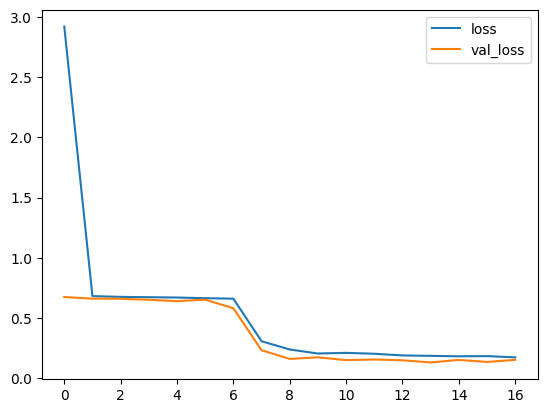

In [24]:
losses[['loss','val_loss']].plot();

In [25]:
print(model.metrics_names)
print(model.evaluate(test, verbose=1))

['loss', 'compile_metrics']
130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step - accuracy: 0.9617 - loss: 0.1274
[0.13182300329208374, 0.9592354893684387]


In [40]:
predictions = np.argmax(model.predict(test), axis=1)
predictions

130/130 ━━━━━━━━━━━━━━━━━━━━ 20s 153ms/step


array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [41]:
y_true = np.concatenate([labels for images, labels in test], axis=0)
y_true

array([1, 0, 0, ..., 0, 0, 1])

In [42]:
print(classification_report(y_true, predictions, target_names=test.class_names))

              precision    recall  f1-score   support

 Parasitized       0.50      0.49      0.49      4070
  Uninfected       0.51      0.52      0.51      4197

    accuracy                           0.50      8267
   macro avg       0.50      0.50      0.50      8267
weighted avg       0.50      0.50      0.50      8267

